# Data loading

In [1]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
jar = pd.read_csv('fuel_swelling_20240109.txt', sep=' ')
columns_drop = ['%eval_id', 'interface', 'FD1', 'FD2', 'FD3', 'fuel_swelling2', 'fuel_swelling3']
jar.drop(columns=columns_drop, inplace=True)

In [3]:
jar

,dGrainHBS,FaceCovMax,SwellLink,vResol,DatomFissGBx,fNucleate,aAtomDifFiss,fuel_swelling1
0,0.000044,0.725,0.02270,1.907000e-18,29010.0,6.315000e-10,5.296000e-31,8.346732
1,0.000048,0.899,0.02587,2.074000e-18,28080.0,6.653000e-10,5.740000e-31,8.321715
2,0.000045,0.835,0.02241,2.134000e-18,35430.0,6.577000e-10,5.252000e-31,8.315956
3,0.000046,0.628,0.02796,1.870000e-18,31140.0,5.596000e-10,5.104000e-31,8.367066
4,0.000042,0.725,0.02707,1.696000e-18,27470.0,6.026000e-10,5.070000e-31,8.382260
...,...,...,...,...,...,...,...,...
3195,0.000038,0.787,0.02303,2.002000e-18,28810.0,5.710000e-10,4.533000e-31,8.298438
3196,0.000039,0.743,0.02428,1.664000e-18,24780.0,6.381000e-10,5.127000e-31,8.374523
3197,0.000038,0.800,0.02456,1.751000e-18,31310.0,5.117000e-10,5.247000e-31,8.412740
3198,0.000046,0.795,0.02365,2.136000e-18,36170.0,5.038000e-10,5.705000e-31,8.368920


# Linear

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [5]:
feat_ind = list(range(7))
features = jar.iloc[:, feat_ind]
xscaler = StandardScaler()
X = xscaler.fit_transform(features)
y = jar['fuel_swelling1']

In [6]:
reg = LinearRegression().fit(X, y)

In [7]:
reg.score(X, y)

0.9946161178609967

In [8]:
reg.coef_

array([-3.23565226e-05, -7.11882241e-05,  2.27050870e-05, -4.15102052e-02,
        1.14404072e-02, -1.15880044e-02,  2.57878512e-02])

# Sensitivity Analysis

In [9]:
from SALib.analyze.sobol import analyze
from SALib.sample.sobol import sample

In [10]:
problem = {
    'num_vars': 7,
    'names': ['dGrainHBS', 'FaceCovMax', 'SwellLink', 'vResol',
              'DatomFissBGx', 'fNucleate', 'aAtomDifFiss'],
    'bounds': [[-3, 3]]*7
}

In [11]:
param_vals = sample(problem, 1024)
Y = reg.predict(param_vals)

In [12]:
Si = analyze(problem, Y, print_to_console=True)

/home/atom/research/wd-swelling/.swel/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                        ST       ST_conf
dGrainHBS     3.945856e-07  3.185921e-08
FaceCovMax    1.910002e-06  1.670404e-07
SwellLink     1.942963e-07  1.509601e-08
vResol        6.494225e-01  4.534392e-02
DatomFissBGx  4.932880e-02  4.787904e-03
fNucleate     5.090638e-02  4.129442e-03
aAtomDifFiss  2.506386e-01  1.901770e-02
                        S1   S1_conf
dGrainHBS     3.945394e-07  0.000058
FaceCovMax    1.909994e-06  0.000108
SwellLink     1.942985e-07  0.000034
vResol        6.494964e-01  0.060613
DatomFissBGx  4.932849e-02  0.016637
fNucleate     4.958869e-02  0.018913
aAtomDifFiss  2.506383e-01  0.036824
                                        S2   S2_conf
(dGrainHBS, FaceCovMax)      -1.149359e-07  0.000081
(dGrainHBS, SwellLink)       -1.148753e-07  0.000081
(dGrainHBS, vResol)          -1.149260e-07  0.000103
(dGrainHBS, DatomFissBGx)    -1.149198e-07  0.000086
(dGrainHBS, fNucleate)       -1.149047e-07  0.000086
(dGrainHBS, aAtomDifFiss)     2.421785e-11  0.000091
(Face

/home/atom/research/wd-swelling/.swel/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

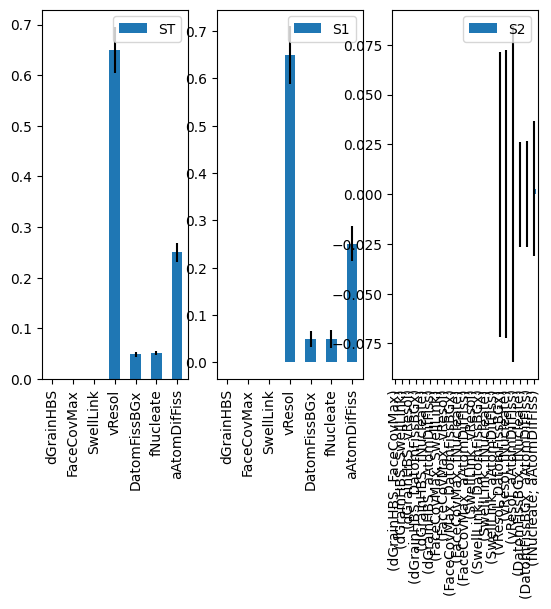

In [13]:
Si.plot()